
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Екатерина Демидова, Data Scientist @ Segmento. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: 

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [2]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs). Скачайте [данные](https://drive.google.com/file/d/1nV2qV9otN3LnVSDqy95hvpJdb6aWtATk/view?usp=sharing) соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [5]:
# при необходимости поменяйте путь к данным
df = pd.read_csv("C:/Users/plomo/Downloads/howpop_train.csv")

In [38]:
df.shape

(134137, 18)

In [7]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [8]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [10]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/ibm/blog/180337/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [11]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [12]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [47]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

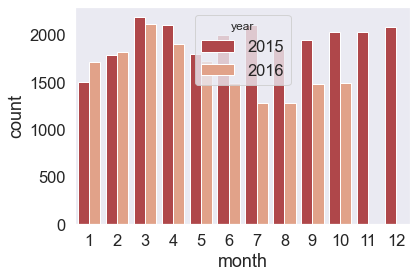

In [32]:
years_df = df[(df['year'] == 2015) | (df['year'] == 2016)]
sns.countplot(years_df.month, hue=years_df.year);

# Ответ: Апрель 2015

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

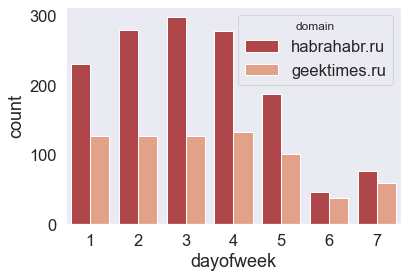

In [52]:
sns.countplot(x=df[(df['month'] == 4) & (df['year'] == 2015)].dayofweek, hue=df[(df['month'] == 4) & (df['year'] == 2015)]['domain'])

# Ответ: Все верно.

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [95]:
df.groupby(['hour','domain'], as_index=False).agg({'views' : 'sum',
                                                     'comments' : 'sum'}).sort_values(['views', 'comments'], ascending=False)

,hour,domain,views,comments
25,12,habrahabr.ru,136662730,252113
27,13,habrahabr.ru,131660016,256773
29,14,habrahabr.ru,127771476,246043
23,11,habrahabr.ru,124232774,222574
33,16,habrahabr.ru,119198011,235320
31,15,habrahabr.ru,118144185,247120
35,17,habrahabr.ru,102786259,218440
21,10,habrahabr.ru,102550807,179361
37,18,habrahabr.ru,92937989,192593
39,19,habrahabr.ru,75726863,162329


## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [96]:
df[df.author.isin([
    '@Mordatyj', '@Mithgol', 
    '@alizar', '@ilya42'])].groupby('author')[['votes_minus']]\
    .mean().sort_values('votes_minus', ascending = False)

,votes_minus
author,
@Mithgol,20.481081
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

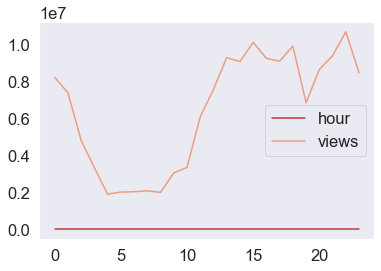

In [99]:
df[df['dayofweek'] == 6].groupby('hour', as_index=False).agg({'views' : 'sum'}).plot()

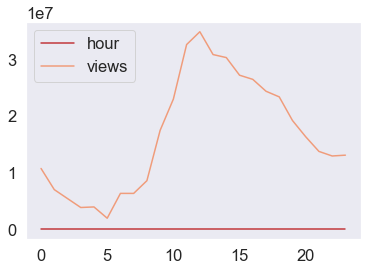

In [100]:
df[df['dayofweek'] == 1].groupby('hour', as_index=False).agg({'views' : 'sum'}).plot()

# Ответ: нет. Наоборот.